<a href="https://www.kaggle.com/code/yusefsavid/clusters-challenge-azure?scriptVersionId=121310004" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Clustering Challenge

Clustering is an *unsupervised* machine learning technique in which you train a model to group similar entities into clusters based on their features.

In this exercise, you must separate a dataset consisting of three numeric features (**A**, **B**, and **C**) into clusters. Run the cell below to load the data.

## Import packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering

Your challenge is to identify the number of discrete clusters present in the data, and create a clustering model that separates the data into that number of clusters. You should also visualize the clusters to evaluate the level of separation achieved by your model.

Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [04 - Clustering Solution.ipynb](04%20-%20Clustering%20Solution.ipynb).

## Explore the data

In [3]:
data = pd.read_csv('/kaggle/input/flights/challenges/data/clusters.csv')
data.head()

,A,B,C
0,-0.087492,0.398000,0.014275
1,-1.071705,-0.546473,0.072424
2,2.747075,2.012649,3.083964
3,3.217913,2.213772,4.260312
4,-0.607273,0.793914,-0.516091


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1000 non-null   float64
 1   B       1000 non-null   float64
 2   C       1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [5]:
data.describe()

,A,B,C
count,1000.000000,1000.000000,1000.000000
mean,1.513081,1.520776,1.498351
std,1.250841,1.247587,1.267040
min,-1.649121,-1.631006,-1.921651
25%,0.542161,0.561720,0.483172
50%,1.520402,1.526202,1.466841
75%,2.483222,2.505169,2.485410
max,4.497581,4.442727,4.678731


In [6]:
data.isnull().sum()

A    0
B    0
C    0
dtype: int64

## Visualize the data

In [7]:
pca = PCA(n_components = 2)
data_pca = pca.fit_transform(data.values)

Text(0, 0.5, 'Second PCA component')

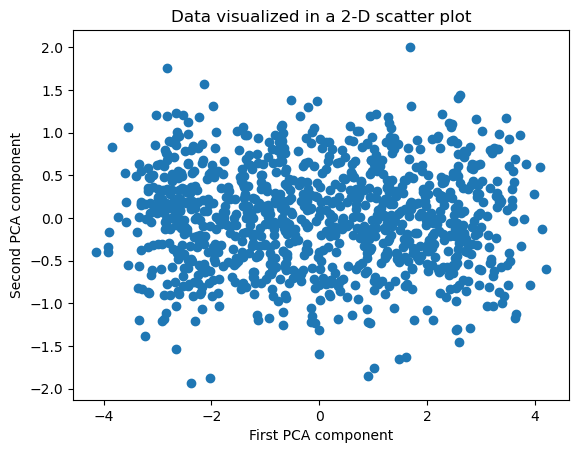

In [8]:
plt.scatter(x = data_pca[:,0], y = data_pca[:,1])
plt.title("Data visualized in a 2-D scatter plot")
plt.xlabel("First PCA component")
plt.ylabel("Second PCA component")

## Train models with different cluster numbers to find optimum cluster number

Text(0.5, 1.0, 'Elbow plot')

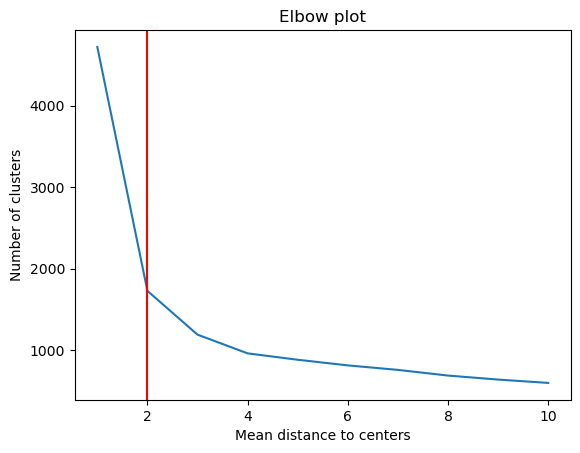

In [9]:
inertias = []
for i in np.arange(1,11):
    model = KMeans(n_clusters = i)
    model.fit(data.values)
    inertias.append(model.inertia_)
sns.lineplot(x = np.arange(1,11) , y = inertias)
plt.axvline(x = 2 , c = "r")
# plt.axvline(x = 3 , c = "g")
plt.xlabel("Mean distance to centers")
plt.ylabel("Number of clusters")
plt.title("Elbow plot")

We probably can deduce that the appropriate number of clusters is 2 clusters as that is where the slope changes most dramatically.

## Train model with n_clusters set to 2

In [10]:
clusters = 2
model = KMeans(n_clusters = clusters)
data_clusters = model.fit(data.values)

## Visualize results and assign clusters

<AxesSubplot:>

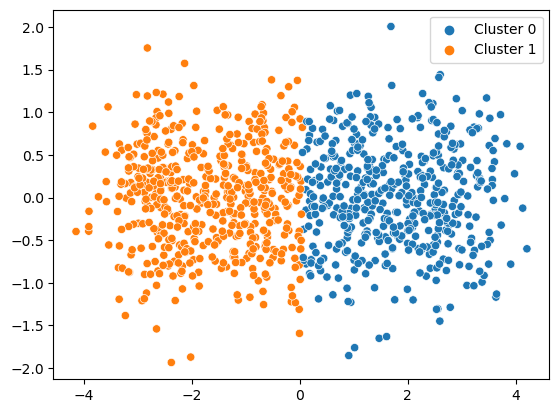

In [11]:
sns.scatterplot(x = data_pca[:,0] , y = data_pca[:,1] , \
                hue = np.core.defchararray.add\
                (np.repeat("Cluster " , repeats = len(data_clusters.labels_)) , data_clusters.labels_.astype(str)) )